# Transferência de Calor e Mecânica dos Sólidos - APS 1

Estamos interessados em avaliar o comportamento térmico de uma aleta tipo pino construída em Alumínio-2014 e utilizada para aumentar a troca térmica de uma superfície que se encontra a 100°𝐶 imersa em um ambiente a 25°𝐶sem movimentação forçada de fluido. Outras informações sobre a geometria da aleta estão disponíveis na Tabela 1. 


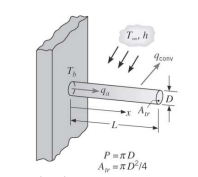
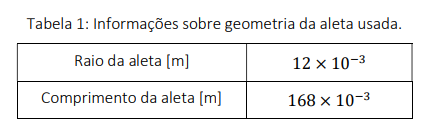


## Questão 1

1. [5,0 pontos] Desenvolva um programa em Python que receba as informações necessárias para determinar cada um dos itens a seguir:

* Ajuste o modelo e defina as condições de contorno para obter um gráfico da distribuição de temperatura (𝑇௔௡௔௟í௧௜௖௔) ao longo do comprimento da aleta. Qual a temperatura na extremidade da aleta?

* Determine a taxa de transferência de calor, a eficiência e a efetividade para a geometria da aleta usada.

* Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor. Compare esse valor com o resultado obtido no item anterior. Qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a perda de calor. 

In [56]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# Determine a temperatura na extremidade da aleta

# Dados

r = 0.012 #raio (m)
L = 0.168 #comprimento (m)
P = 2 * math.pi * r #perímetro (m)
A = math.pi * r**2 #área (m)
h = 15 #coeficiente de transferência térmica (W/m^2K)
k = 200 # (W/mK) 
T_infinita = 25 + 273 # (K)
T_B = 100 + 273 # (K)
theta_B = T_B - T_infinita
m = ((h*P)/(k*A))**0.5

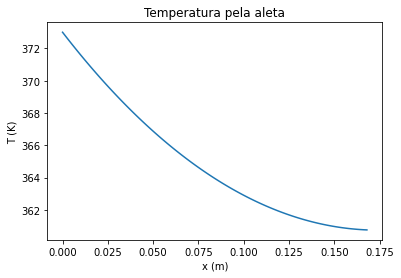

Temperatura na extremidade (K):  360.7614225367864


In [58]:
x_list = np.linspace(0,L,100)
T_list = []
for x in x_list:
    T_list.append(T_infinita + theta_B * (math.cosh(m*(L-x)) + h/(m*k)*math.sinh(m*(L-x))) / (math.cosh(m*L) + h/(m*k)*math.sinh(m*L)))

plt.plot(x_list, T_list)
plt.title("Temperatura pela aleta")
plt.ylabel("T (K)")
plt.xlabel("x (m)")
plt.show()

# Na extremidade da aleta, x = L
x = L
T = T_infinita + theta_B * (math.cosh(m*(L-x)) + h/(m*k)*math.sinh(m*(L-x))) / (math.cosh(m*L) + h/(m*k)*math.sinh(m*L))
print("Temperatura na extremidade (K): ", T)

In [62]:
# Taxa de transferência de calor

M = theta_B * (h*P*k*A)**0.5
q_A = M * (math.sinh(m*L) + h/(m*k)*math.cosh(m*L)) / (math.cosh(m*L) + h/(m*k)*math.sinh(m*L))
print('Taxa de transferência de calor: ', q_A)

# Eficiência

A_s = A + 2*math.pi*r*L
q_max = h*A_s*theta_B
n_a = q_A/q_max
print('Eficiência: ', n_a)

# Efetividade

e_a = q_A / (h*A*theta_B)
print('Efetividade: ', e_a)

Taxa de transferência de calor:  13.141799001477942
Eficiência:  0.8904139089848229
Efetividade:  25.822003360559865


In [63]:
# Para aleta infinita, taxa de transferência de calor = M

print('Taxa de transferência de calor: ', M)

Taxa de transferência de calor:  23.991567866055174
